In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pyclustering.cluster.kmedians import kmedians
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster import cluster_visualizer_multidim
from sklearn.decomposition import PCA
import pickle
from tqdm.notebook import tqdm

In [2]:
dataset_description = pd.read_csv('../Data/Dataset_Description.csv')

In [3]:
# dataset_description

In [4]:
population_data_raw = pd.read_csv('../Data/population.csv')
more_than_50_raw = pd.read_csv('../Data/more_than_50k.csv')

# population_data_raw 

In [5]:
def preprocessing(df):

    #replace ? with Nan
    df = df.replace({' ?' :  np.nan})

    #drop columns with more than 40$ NaN values
    cols = df.columns
    missing_percentages = (df.isna().sum() / len(df)) * 100
    cols_to_drop = []
    for col in cols:
        if(missing_percentages[col] > 40.0):
            cols_to_drop.append(col)
    print(f'Dropping = {cols_to_drop}')
    df = df.drop(cols_to_drop, axis=1)
    return df

In [6]:
data = preprocessing(population_data_raw)
print(data.shape)

Dropping = ['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN']
(199523, 36)


In [7]:
data_more_than_50 = preprocessing(more_than_50_raw)
print(data_more_than_50.shape)

Dropping = ['MIGMTR1', 'MIGMTR3', 'MIGMTR4', 'MIGSUN']
(3580, 36)


In [8]:
def plot_histogram(df, numeric_columns, categorical_columns, anum):
    # features = df.columns
    # for feat in features:
    #     plt.figure(figsize=(25,5))
    #     if(feat in numeric_columns):
    #         df[feat].hist(bins=10,edgecolor='black', linewidth=1.5)

    #     else:
    #         unique_cat_values = len(df[feat].unique())
    #         print(f'No. of unique Categories : {unique_cat_values}')
    #         df[feat].hist(bins = unique_cat_values, edgecolor='black', linewidth=1.5)
    #     plt.xlabel(feat)
    #     plt.ylabel('Count')
    #     plt.title(f'Histogram : {feat}')
    #     plt.savefig(f'../Plots/Feature_Analysis/{feat}_hist', facecolor='w', bbox_inches='tight')
    #     plt.show()
    features = df.columns
    for feat in features:
        plt.figure(figsize=(25, 5))
        # if(feat in numeric_columns)
        unique_cat_values = len(df[feat].unique())
        print(f'No. of unique Categories : {unique_cat_values}')
        df[feat].astype(str).hist(bins = unique_cat_values, edgecolor='black', linewidth=1.5)
        plt.xlabel(feat)
        plt.ylabel('Count')
        plt.title(f'Histogram : {feat}')
        plt.savefig(f'../Plots/Feature_Analysis_{anum}/{feat}_hist', facecolor='w', bbox_inches='tight')
        plt.show()

In [9]:
def compute(df, col):
    max_freq = df[col].value_counts().max()
    max_perc = (max_freq / df.shape[0]) * 100
    print(max_perc)

In [10]:
def feature_analysis(df, anum):
    data_columns = df.columns
    numeric_columns = ['AAGE', 'AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'WKSWORK']
    all_cols_set = set(data_columns)
    numerical_cols_set = set(numeric_columns)
    categorical_cols = list(all_cols_set - numerical_cols_set)
    
    for col in numeric_columns:
        df[col] = pd.cut(x=df[col], bins=6)
    # df['AAGE']
    # plot_histogram(df, numeric_columns, categorical_cols, anum)
    total_count = df.shape[0]

    cols_to_drop = []
    for col in data_columns:
        max_freq = df[col].value_counts().max()
        max_perc = (max_freq / total_count) * 100
        if(max_perc > 80.0):
            cols_to_drop.append(col)
    print(f'{anum} : Dropping {len(cols_to_drop)} cols \n {cols_to_drop}')
    df = df.drop(cols_to_drop, axis=1)
    return df

    # print(df)


    # print(categorical_cols)


In [11]:
# data.mode()

In [12]:
data = feature_analysis(data, 1)
data_more_than_50 = feature_analysis(data_more_than_50, 2)

1 : Dropping 16 cols 
 ['AHRSPAY', 'AHSCOL', 'ARACE', 'AREORGN', 'AUNMEM', 'AUNTYPE', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'GRINREG', 'GRINST', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA']
2 : Dropping 20 cols 
 ['AHRSPAY', 'AHSCOL', 'ARACE', 'AREORGN', 'AUNMEM', 'AUNTYPE', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'GRINREG', 'GRINST', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 'VETQVA', 'VETYN', 'WKSWORK']


In [13]:
data.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AMARITL', 'AMJIND',
       'AMJOCC', 'ASEX', 'AWKSTAT', 'FILESTAT', 'HHDFMX', 'HHDREL', 'MIGSAME',
       'NOEMP', 'PARENT', 'PEFNTVTY', 'VETYN', 'WKSWORK', 'YEAR'],
      dtype='object')

In [14]:
data_more_than_50.columns

Index(['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AMARITL', 'AMJIND',
       'AMJOCC', 'ASEX', 'AWKSTAT', 'FILESTAT', 'HHDFMX', 'HHDREL', 'MIGSAME',
       'NOEMP', 'YEAR'],
      dtype='object')

In [15]:
data.isna().sum()

AAGE           0
ACLSWKR        0
ADTIND         0
ADTOCC         0
AHGA           0
AMARITL        0
AMJIND         0
AMJOCC         0
ASEX           0
AWKSTAT        0
FILESTAT       0
HHDFMX         0
HHDREL         0
MIGSAME        0
NOEMP          0
PARENT         0
PEFNTVTY    6713
VETYN          0
WKSWORK        0
YEAR           0
dtype: int64

In [16]:
data_more_than_50.isna().sum()

AAGE        0
ACLSWKR     0
ADTIND      0
ADTOCC      0
AHGA        0
AMARITL     0
AMJIND      0
AMJOCC      0
ASEX        0
AWKSTAT     0
FILESTAT    0
HHDFMX      0
HHDREL      0
MIGSAME     0
NOEMP       0
YEAR        0
dtype: int64

In [17]:
data.mode()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AMARITL,AMJIND,AMJOCC,ASEX,AWKSTAT,FILESTAT,HHDFMX,HHDREL,MIGSAME,NOEMP,PARENT,PEFNTVTY,VETYN,WKSWORK,YEAR
0,"(-0.09, 15.0]",Not in universe,0,0,High school graduate,Never married,Not in universe or children,Not in universe,Female,Children or Armed Forces,Nonfiler,Householder,Householder,Not in universe under 1 year old,0,Not in universe,United-States,2,"(-0.052, 8.667]",94


In [18]:
data_more_than_50.mode()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AMARITL,AMJIND,AMJOCC,ASEX,AWKSTAT,FILESTAT,HHDFMX,HHDREL,MIGSAME,NOEMP,YEAR
0,"(42.0, 54.0]",Private,45,2,Bachelors degree(BA AB BS),Married-civilian spouse present,Manufacturing-durable goods,Executive admin and managerial,Male,Children or Armed Forces,Joint both under 65,Householder,Householder,Not in universe under 1 year old,6,95


In [19]:
def column_modifications(df):
    column_modes = df.mode()
    data_cols = df.columns
    # print(df.isna().sum())
    for col in data_cols:
        missing_vals = df[col].isna().sum()
        if(missing_vals > 0):
            df[col] = df[col].fillna(column_modes[col][0])
    # print(df.isna().sum())
    one_hot_encoded = pd.get_dummies(df, columns=list(df.columns))
    df = one_hot_encoded

    return df        


In [20]:
data = column_modifications(data)
print(data.shape)
data_more_than_50 = column_modifications(data_more_than_50)

(199523, 307)


In [21]:
data

,"AAGE_(-0.09, 15.0]","AAGE_(15.0, 30.0]","AAGE_(30.0, 45.0]","AAGE_(45.0, 60.0]","AAGE_(60.0, 75.0]","AAGE_(75.0, 90.0]",ACLSWKR_ Federal government,ACLSWKR_ Local government,ACLSWKR_ Never worked,ACLSWKR_ Not in universe,...,VETYN_1,VETYN_2,"WKSWORK_(-0.052, 8.667]","WKSWORK_(8.667, 17.333]","WKSWORK_(17.333, 26.0]","WKSWORK_(26.0, 34.667]","WKSWORK_(34.667, 43.333]","WKSWORK_(43.333, 52.0]",YEAR_94,YEAR_95
0,0,0,0,0,1,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
2,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,0,0,0,0,0,1,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
199519,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
199520,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
199521,0,1,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1


In [22]:
data_more_than_50

,"AAGE_(17.928, 30.0]","AAGE_(30.0, 42.0]","AAGE_(42.0, 54.0]","AAGE_(54.0, 66.0]","AAGE_(66.0, 78.0]","AAGE_(78.0, 90.0]",ACLSWKR_ Federal government,ACLSWKR_ Local government,ACLSWKR_ Never worked,ACLSWKR_ Not in universe,...,MIGSAME_ Yes,NOEMP_0,NOEMP_1,NOEMP_2,NOEMP_3,NOEMP_4,NOEMP_5,NOEMP_6,YEAR_94,YEAR_95
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3575,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
3576,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
3577,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3578,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0


PCA

In [23]:
def performPCA(df, anum):
    pca = PCA()
    pca.fit(np.array(df))
    exp_var_rat = pca.explained_variance_ratio_
    cum_exp_var_perc = np.cumsum(exp_var_rat)
    plt.plot(cum_exp_var_perc)
    plt.xlabel('Cumulative explained variance')
    plt.ylabel('Number of components')
    plt.title(f'PCA Analysis - {anum}')
    plt.savefig(f'../Plots/Dimesionality_Reduction/pca_plot_{anum}.png', facecolor='white', bbox_inches='tight')
    plt.show()

    return pca, cum_exp_var_perc


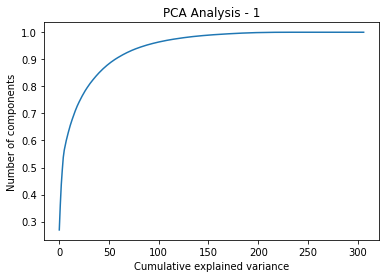

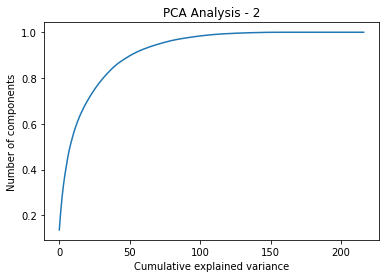

In [24]:
pca_1, cum_var_1 = performPCA(data, 1)
pca_2, cum_var_2 = performPCA(data_more_than_50, 2)

In [25]:
# print(cum_var_1[30])

In [26]:
# print(len(cum_var_2))
# for i in range(len(cum_var_2)):
#     # print(cum_var_2[i])
#     if(cum_var_2[i] >= 0.85):
#         print(i)
#         break
# print(cum_var_2[32])

In [27]:
pca_final_1 = PCA(n_components=30)
dim_reduced_data_1 = pca_final_1.fit_transform(np.array(data))

pca_final_2 = PCA(n_components=32)
dim_reduced_data_2 = pca_final_2.fit_transform(np.array(data_more_than_50))

In [28]:
print(f' 1 - {dim_reduced_data_1.shape}')
print(f' 2 - {dim_reduced_data_2.shape}')

 1 - (199523, 30)
 2 - (3580, 32)


CLUSTERING

In [29]:
num_samples_1 = data.shape[0]
num_samples_2 = data_more_than_50.shape[0]
print(num_samples_1, num_samples_2)

199523 3580


Normal population data

In [30]:
avg_cluster_distance_byK_1 = {}
avg_cluster_distance_byN_1 = {}
for k_value in tqdm(range(10, 25)):

    print(f'-------- K VALUE = {k_value} --------')
    random_points_1 = np.array(pd.DataFrame(dim_reduced_data_1).sample(n=k_value)).tolist()

    # print('PERFORMING CLUSTERING')
    medians_init_1 = random_points_1
    kmedians_clusterer_1 = kmedians(dim_reduced_data_1, medians_init_1)
    kmedians_clusterer_1.process()

    file = open(f'../models/part_1/kmedians_{k_value}.pickle', 'wb')
    pickle.dump(kmedians_clusterer_1, file)
    file.close()

    avg_dist_byK_1 = kmedians_clusterer_1.get_total_wce() / k_value
    avg_dist_byN_1 = kmedians_clusterer_1.get_total_wce() / num_samples_1
    
    avg_cluster_distance_byK_1[k_value] = avg_dist_byK_1
    avg_cluster_distance_byN_1[k_value] = avg_dist_byN_1
    print(f'average within cluster distance (byK) = {avg_dist_byK_1}')
    print(f'average within cluster distance (byN) = {avg_dist_byN_1}')
    # print('INSTANCE PROCESSED')
    clusters_1 = kmedians_clusterer_1.get_clusters()
    medians_1 = kmedians_clusterer_1.get_medians()
    np.save(f'../model_info/part_1/clusters/clusters_{k_value}.npy', np.array(clusters_1))
    np.save(f'../model_info/part_1/medians/medians_{k_value}.npy', np.array(medians_1))


  0%|          | 0/15 [00:00<?, ?it/s]

-------- K VALUE = 10 --------
average within cluster distance (byK) = 144199.0557735769
average within cluster distance (byN) = 7.227189635960611
-------- K VALUE = 11 --------


C:\Users\SAMYAK~1\AppData\Local\Temp/ipykernel_28976/4042099762.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(f'../model_info/part_1/clusters/clusters_{k_value}.npy', np.array(clusters_1))


average within cluster distance (byK) = 155730.0591245555
average within cluster distance (byN) = 8.585629979351305
-------- K VALUE = 12 --------
average within cluster distance (byK) = 116697.9745221997
average within cluster distance (byN) = 7.018617874963771
-------- K VALUE = 13 --------
average within cluster distance (byK) = 110801.63817430915
average within cluster distance (byN) = 7.2193245704305715
-------- K VALUE = 14 --------
average within cluster distance (byK) = 102523.81753650183
average within cluster distance (byN) = 7.193824498985208
-------- K VALUE = 15 --------
average within cluster distance (byK) = 93413.5766375764
average within cluster distance (byN) = 7.022767548421215
-------- K VALUE = 16 --------
average within cluster distance (byK) = 81770.00573731588
average within cluster distance (byN) = 6.557239475133463
-------- K VALUE = 17 --------
average within cluster distance (byK) = 72930.74626004105
average within cluster distance (byN) = 6.213933663891872


In [31]:
def plot_clust_dist(avg_clust_distance, anum):
    plt.plot([x for x in range(10, 25)], list(avg_clust_distance.values()), marker='o')
    plt.xlabel('No. of clusters')
    plt.ylabel('Average cluster distance')
    plt.title('avg cluster distance vs number of clusters (1)')
    plt.savefig(f'../Plots/cluster_distance_{anum}', facecolor='white', bbox_inches='tight')
    plt.show()

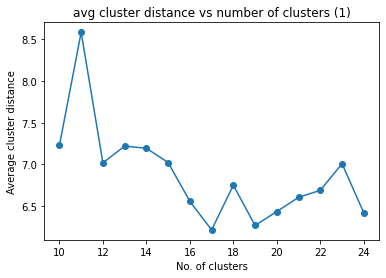

In [32]:
plot_clust_dist(avg_cluster_distance_byN_1, 1)

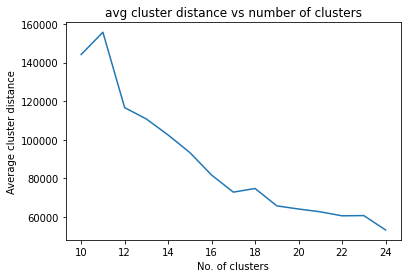

In [33]:
plt.plot([x for x in range(10, 25)], list(avg_cluster_distance_byK_1.values()))
plt.xlabel('No. of clusters')
plt.ylabel('Average cluster distance')
plt.title('avg cluster distance vs number of clusters')
plt.show()

More than 50k 

In [58]:
avg_cluster_distance_byK_2 = {}
avg_cluster_distance_byN_2 = {}
for k_value in tqdm(range(10, 25)):

    print(f'-------- K VALUE = {k_value} --------')
    random_points_2 = np.array(pd.DataFrame(dim_reduced_data_2).sample(n=k_value)).tolist()

    # print('PERFORMING CLUSTERING')
    medians_init_2 = random_points_2
    kmedians_clusterer_2 = kmedians(dim_reduced_data_2, medians_init_2)
    kmedians_clusterer_2.process()

    file = open(f'../models/part_2/kmedians_{k_value}.pickle', 'wb')
    pickle.dump(kmedians_clusterer_2, file)
    file.close()

    avg_dist_byK_2 = kmedians_clusterer_2.get_total_wce() / k_value
    avg_dist_byN_2 = kmedians_clusterer_2.get_total_wce() / num_samples_2
    
    avg_cluster_distance_byK_2[k_value] = avg_dist_byK_2
    avg_cluster_distance_byN_2[k_value] = avg_dist_byN_2
    print(f'average within cluster distance (byK) = {avg_dist_byK_2}')
    print(f'average within cluster distance (byN) = {avg_dist_byN_2}')
    # print('INSTANCE PROCESSED')
    clusters_2 = kmedians_clusterer_2.get_clusters()
    medians_2 = kmedians_clusterer_2.get_medians()
    np.save(f'../model_info/part_2/clusters/clusters_{k_value}.npy', np.array(clusters_2))
    np.save(f'../model_info/part_2/medians/medians_{k_value}.npy', np.array(medians_2))


  0%|          | 0/15 [00:00<?, ?it/s]

-------- K VALUE = 10 --------
average within cluster distance (byK) = 3621.911818553628
average within cluster distance (byN) = 10.117072118864883
-------- K VALUE = 11 --------


C:\Users\SAMYAK~1\AppData\Local\Temp/ipykernel_28976/4109842946.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save(f'../model_info/part_2/clusters/clusters_{k_value}.npy', np.array(clusters_2))


average within cluster distance (byK) = 3116.809580511527
average within cluster distance (byN) = 9.576789213862234
-------- K VALUE = 12 --------
average within cluster distance (byK) = 2726.599506120884
average within cluster distance (byN) = 9.139439685321399
-------- K VALUE = 13 --------
average within cluster distance (byK) = 3045.3989682942192
average within cluster distance (byN) = 11.058711337381244
-------- K VALUE = 14 --------
average within cluster distance (byK) = 2099.849333112851
average within cluster distance (byN) = 8.211701302675953
-------- K VALUE = 15 --------
average within cluster distance (byK) = 2153.16138076047
average within cluster distance (byN) = 9.021625897041075
-------- K VALUE = 16 --------
average within cluster distance (byK) = 1841.3282854896424
average within cluster distance (byN) = 8.229400158612927
-------- K VALUE = 17 --------
average within cluster distance (byK) = 1797.1784832970598
average within cluster distance (byN) = 8.534087769846373

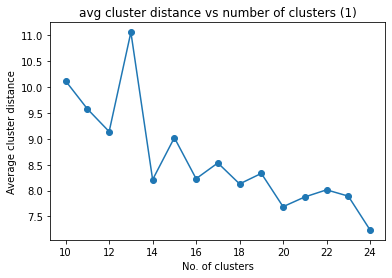

In [59]:
plot_clust_dist(avg_cluster_distance_byN_2, 2)

ValueError: x and y must have same first dimension, but have shapes (41,) and (15,)

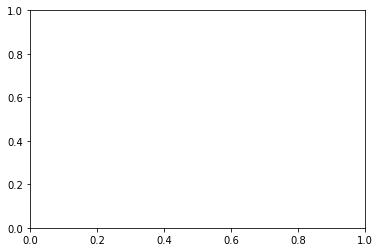

In [60]:
plt.plot([x for x in range(10, 51)], list(avg_cluster_distance_byK_2.values()))
plt.xlabel('No. of clusters')
plt.ylabel('Average cluster distance')
plt.title('avg cluster distance vs number of clusters')
plt.show()


Using 3 dimensional data for visulaization

In [ ]:
# pca_3d = PCA(n_components=3)
# dim_3d_data = pca_3d.fit_transform(data)

In [ ]:
# k_value_3d = 10
# print(f'-------- K VALUE = {k_value_3d} --------')
# random_points_3d = np.array(pd.DataFrame(dim_3d_data).sample(n=k_value_3d)).tolist()
# medians_init_3d = random_points_3d
# kmedians_clusterer_3d = kmedians(dim_3d_data, medians_init_3d)
# kmedians_clusterer_3d.process()
# avg_cluster_dist_3d = kmedians_clusterer_3d.get_total_wce() / k_value_3d
# temp_avg_cluster_dist_3d = kmedians_clusterer_3d.get_total_wce() / dim_3d_data.shape[0]
# print(f'average within cluster distance = {avg_cluster_dist_3d}')
# print(f'Temp average within cluster distance = {temp_avg_cluster_dist_3d}')
# clusters_3d = kmedians_clusterer_3d.get_clusters()
# medians_3d = kmedians_clusterer_3d.get_medians()


In [ ]:
# # dim_3d_data
# pca_df = pd.DataFrame(dim_3d_data, columns=['pca-one', 'pca-two', 'pca-three'])
# pca_df['cluster'] = 0
# for clust_idx in tqdm(range(len(clusters_3d))):
#     for point_idx in clusters_3d[clust_idx]:
#         pca_df.loc[point_idx, 'cluster'] = clust_idx + 1

In [ ]:
# ax = plt.figure(figsize=(20,14)).gca(projection='3d')
# # ax.view_init(20, 90)
# ax.scatter(
#     xs=pca_df['pca-one'], 
#     ys=pca_df['pca-two'], 
#     zs=pca_df['pca-three'], 
#     c=pca_df["cluster"], 
#     cmap='coolwarm',
# )
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# # labs = [c for c in range(1, 11)]
# # plt.legend(handles=labs)
# plt.show()

Using more_than_50k data